## Modeling and Clustering 

Finally it is time to start modeling our data. We will be utilizing KMeans given its accuracy and speed. We will be importing both training and User data set. Panda, Numpy, Matplotlib and Sklearn will be utilized to accomplish our main task to cluster our data and utilizing the algorithm to predict in which label the User's songs fit.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("../data/Processed_data.csv")
rec_df = pd.read_csv("../data/Processed_data_rec.csv")

Before initializing our modeling we need to know the best number of clusters for our data so we will run a function that can create an Elbow Graph 

In [94]:
def optimizs_k_means(df, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
        fig = plt.subplots(figsize= (10, 5))
        plt.plot(means, inertias, 'o-')
        plt.xlabel("Number of Clusters")
        plt.ylabel("Inertia")
        plt.grid(True)
        plt.show()
        

c:\Users\neves\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


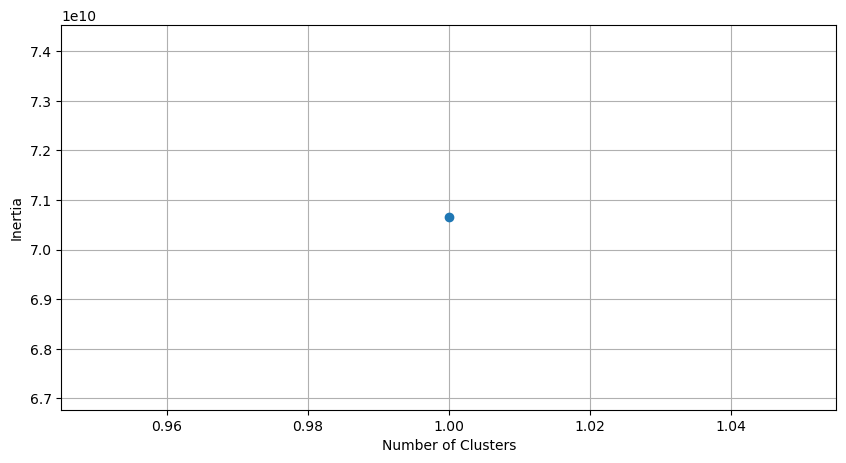

c:\Users\neves\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


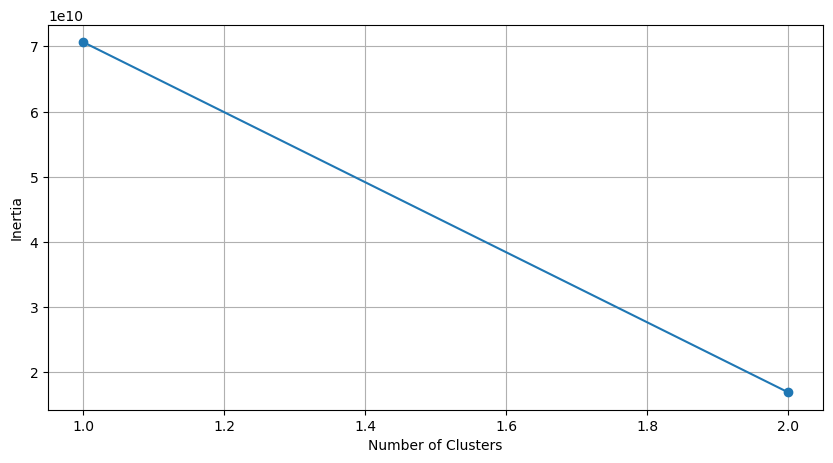

c:\Users\neves\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


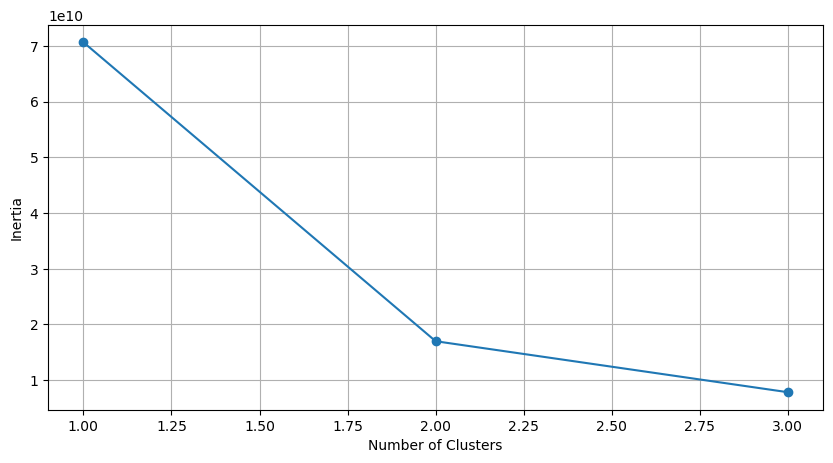

c:\Users\neves\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


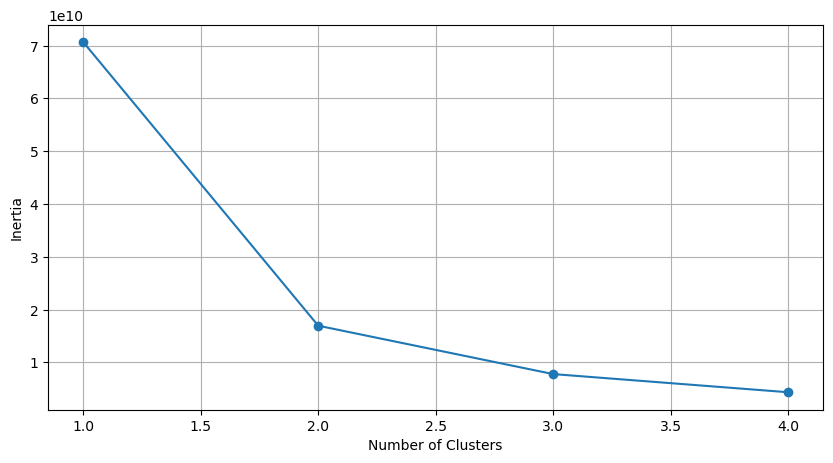

c:\Users\neves\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


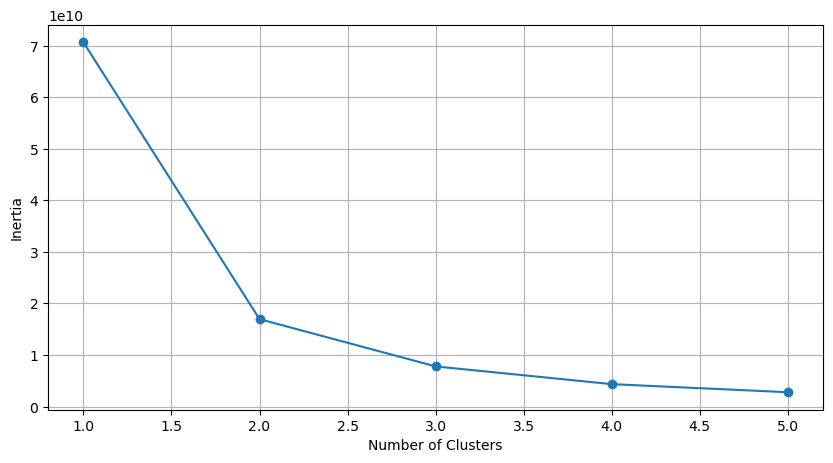

c:\Users\neves\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


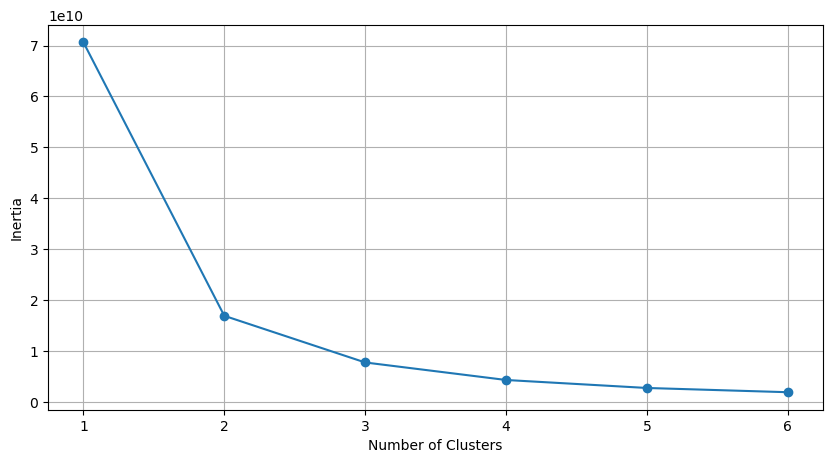

c:\Users\neves\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


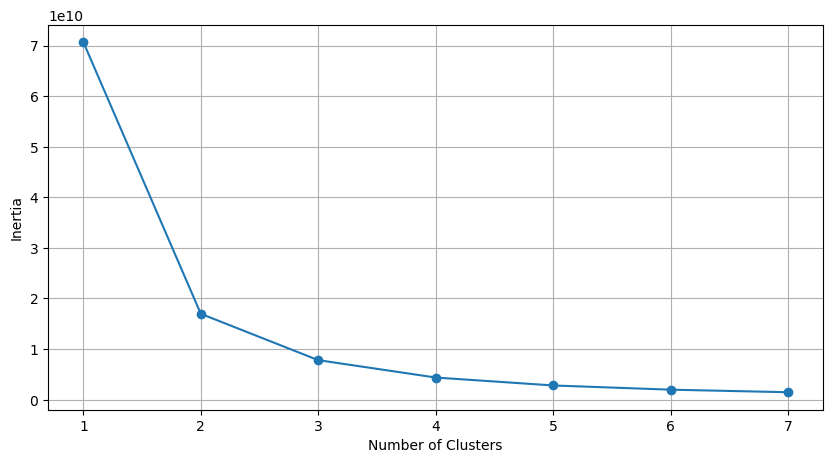

c:\Users\neves\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


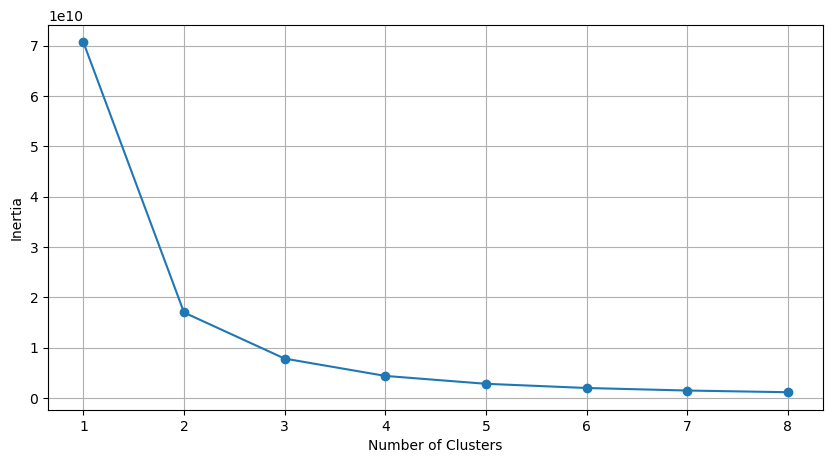

c:\Users\neves\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


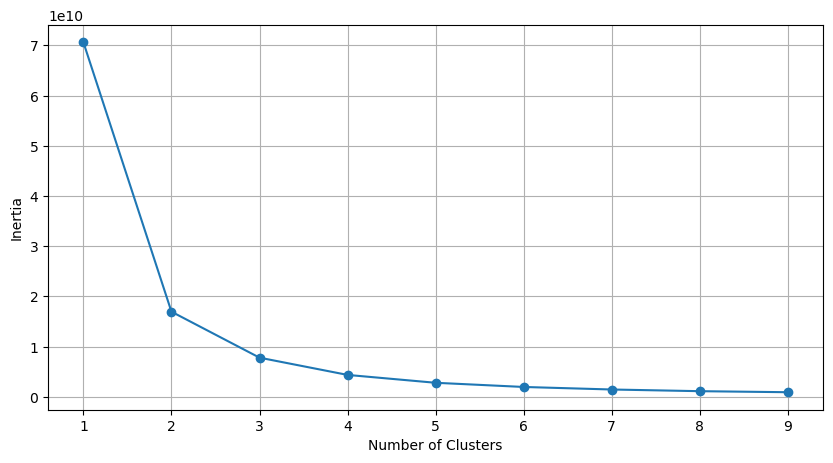

In [95]:
optimizs_k_means(df, 10)

As we see through the analysis we can regard two number of clusters as one of the best options for our modeling however considering the variety of themes around the songs, dividing them in two could be a bit too simplistic so we can increase the number of clusters to 3 or even 4 in order to achieve a more complex modeling.

In [96]:
kmeans = KMeans(n_clusters=3, init= 'k-means++', n_init='auto', max_iter=300)

kmeans.fit(df)

KMeans(n_clusters=3, n_init='auto')

We now store the labeled clusters into a new column to be able to visualize it. Following that we can save it for future analysis and reference.

In [97]:
df['kmeans_3'] = kmeans.labels_

In [106]:
df.to_csv("Clustered_data.csv", index=False)

In [98]:
df

,artist_name,release_date,genre,len,dating,violence,world/life,night/time,shake the audience,family/gospel,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age,kmeans_3
0,3197,1950,4,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,...,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,14,1.000000,1
1,1597,1950,4,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,...,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,3,1.000000,2
2,2300,1950,4,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,...,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,10,1.000000,1
3,3637,1950,4,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,...,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,7,1.000000,1
4,1726,1950,4,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,...,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,7,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,2846,2019,2,78,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,...,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,9,0.014286,1
28358,2838,2019,2,67,0.001284,0.001284,0.035338,0.001284,0.001284,0.001284,...,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,9,0.014286,1
28359,3323,2019,2,77,0.001504,0.154302,0.168988,0.001504,0.039755,0.001504,...,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,9,0.014286,1
28360,5315,2019,2,67,0.001196,0.001196,0.001196,0.001196,0.048359,0.001196,...,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,9,0.014286,0


## Plotting the Results



After the clustering we can take a look at how the clusters behave between two columns. I chose to do it by looking at an Emotion Score and how its spread accros release dates.

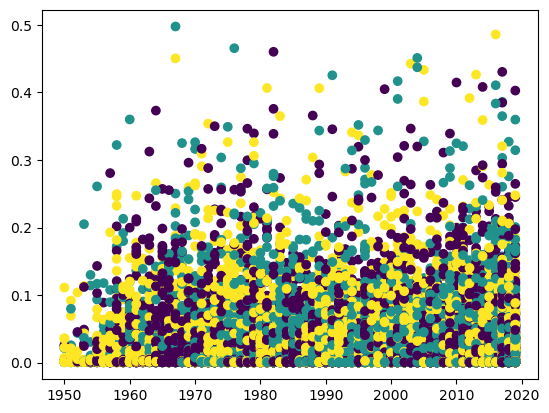

In [99]:

plt.scatter(x=df["release_date"], y=df["shake the audience"], c=df["kmeans_3"])

The data seems to be really mixed however there is still some tendency of cluster proximity with its own clusters. We can now start to fit our data again with kmeans_3 column dropped in order to be compatible with the Users data set. We will be utilizing the same parameters as used on the first clustering.

In [101]:
df = df.drop("kmeans_3", axis=1)

In [102]:
kmeans_rec = KMeans(n_clusters=3, init= 'k-means++', n_init='auto', max_iter=300)

# Fit KMeans on the original data
kmeans_rec.fit(df)

# Predict clusters for the new data
predicted_clusters = kmeans_rec.predict(rec_df)



rec_df['kmeans_3'] = predicted_clusters

rec_df


,artist_name,release_date,genre,len,dating,violence,world/life,night/time,shake the audience,family/gospel,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age,kmeans_3
0,1,1998,6,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,...,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,3,0.314286,1
1,0,1993,5,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,...,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,4,0.385714,1
2,9,1990,4,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,...,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,2,0.428571,1
3,2,1960,4,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,14,0.857143,1
4,5,1966,4,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,...,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,7,0.771429,1
5,3,1952,3,57,0.001462,0.487965,0.140561,0.001462,0.001462,0.001462,...,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.034645,2,0.971429,1
6,6,2000,6,152,0.000675,0.000675,0.134044,0.293819,0.000675,0.000675,...,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,9,0.285714,1
7,8,1970,0,37,0.051874,0.001645,0.001645,0.084118,0.037341,0.001645,...,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,14,0.714286,1
8,7,1986,1,41,0.001504,0.001504,0.132148,0.492312,0.001504,0.001504,...,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,4,0.485714,1
9,4,2009,4,91,0.000711,0.543658,0.114697,0.098286,0.014720,0.000711,...,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,2,0.157143,1


Now that the songs are labeled as belonging to the group one we will filtering all the songs on the training data set that belong to this category and saving the results in a new table. We now will have a table that can demonstrate reccomendations to the User.

In [105]:


reccomendation= df.loc[df["kmeans_3"] == 1, ['artist_name','release_date','genre','len','dating','violence','world/life','night/time','shake the audience','family/gospel','romantic','communication','obscene','music','movement/places','light/visual perceptions','family/spiritual','sadness','feelings','topic']]

reccomendation.to_csv("reccomendations.csv", index=False)